#Time-Series-Prediction
#Name- Abhinav Sarpal
#Roll No- 101917076
#Batch-CSE3

In this project I used Random forest Regresoor Algorithm to predict values of five variables. I used it to predict the values of Para 9,10,11,12,13 and it can be easily seen in the notebook. Then I made some scatter plots of it corresponding to each variable.

#Importing all necessary libraries

In [47]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("dataset.csv")
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


#Preprocessing

In [49]:

df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])   # Dropping section 92 because it only has 9 years of data instead of 10 which we need to predict on.

In [50]:
df.fillna(0, inplace=True)   #Replacing empty cells with zero

In [51]:
j = 0
for i in range(100):
  df.iloc[j:j + 10, 0] = df.iloc[j, 0]
  j += 10

#Test Data

In [52]:
#Test data
d_test = df.loc[df['year'] == 10]
d_test

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


# Model

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [54]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')
d_test.columns = d_test.columns.str.replace('Unnamed: 0', 'Group')
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [55]:
data_name=[]
data_name.append('Para-9')
data_name.append('Para-10')
data_name.append('Para-11')
data_name.append('Para-12')
data_name.append('Para-13')

In [56]:
n = 0
ind = 0
root_mean = []
data_pre = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
list=[10, 11, 12, 13, 14]
for j in list:
  a = 0
  co = 0
  for i in range(0, 1000, 10):
    x_testing = df.iloc[i+9, 1:10].to_numpy()
    y_testing = df.iloc[i+9, j]
    x_training = df.iloc[i:i+9, 1:10]
    y_training = df.iloc[i:i+9, j]
    rf.fit(x_training, y_training)
    y_pre = rf.predict(x_testing.reshape(1,-1))[0]
    data_pre[data_name[ind]].append(y_pre)
    a += (y_testing - y_pre)*(y_testing - y_pre)
    co += 1
    n += 1
  root_mean.append(a)
  ind += 1


  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

#Making Predictions

In [57]:
data_predict = pd.DataFrame.from_dict(data_pre)
data_predict

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.306000,51.507667,32.680000,7.446667,1.887433
1,51.627000,26.414333,0.836667,7.016667,0.785683
2,61.552667,0.000000,0.000000,11.040000,1.363317
3,16.272333,48.607333,53.060000,6.726667,1.757997
4,0.000000,245.506667,33.670000,5.783333,1.660750
...,...,...,...,...,...
95,147.435333,171.157000,8.190000,6.980000,1.476807
96,3.932000,54.931333,20.733333,11.526667,1.060374
97,90.027667,51.706667,11.103333,10.426667,0.854453
98,96.992333,199.933667,119.960000,9.736667,1.989587


#Root Mean Square Error

In [58]:
print((sum(root_mean)/n)**0.5)

49.793704466179584


# Making Plots

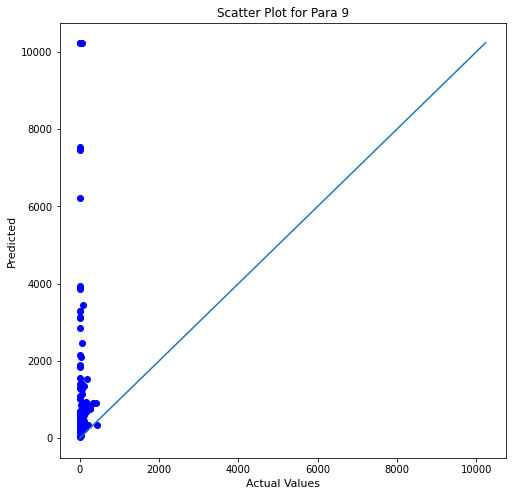

In [59]:
predicted = d_test.iloc[:,9]
true = data_predict.iloc[:,0]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='blue',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 9')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()


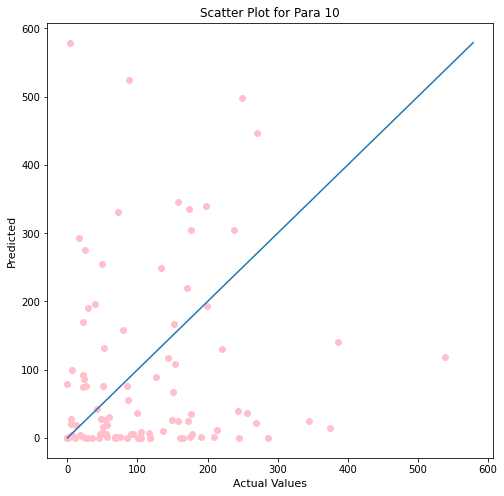

In [60]:
predicted = d_test.iloc[:,10]
true = data_predict.iloc[:,1]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='pink',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 10')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()



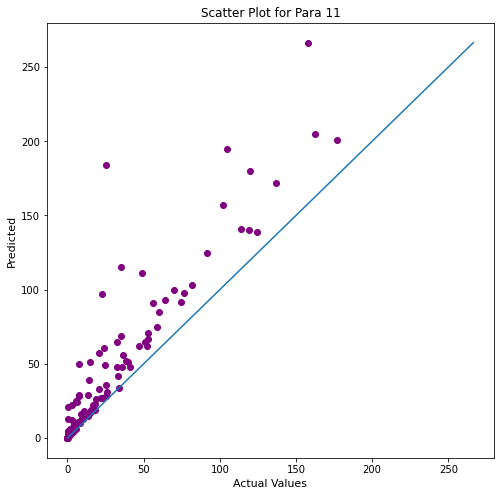

In [61]:
predicted = d_test.iloc[:,12]
true = data_predict.iloc[:,2]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='purple',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 11')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()

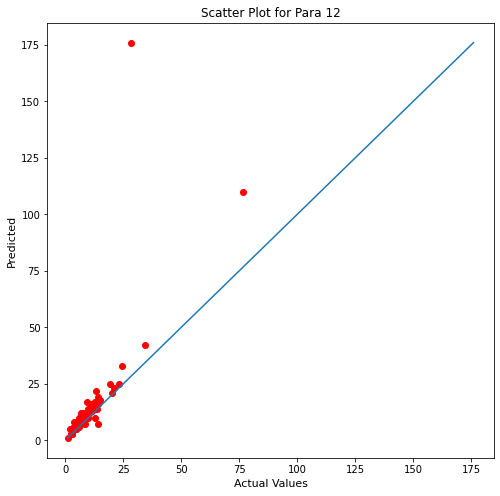

In [69]:
predicted = d_test.iloc[:,13]
true = data_predict.iloc[:,3]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='red',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 12')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()

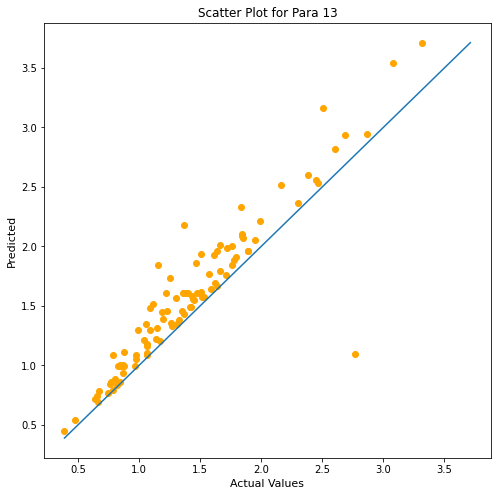

In [63]:
predicted = d_test.iloc[:,14]
true = data_predict.iloc[:,4]
plt.figure(figsize=(8,8))
plt.scatter(true, predicted, c='orange',edgecolors=None)
part1 = max(max(predicted), max(true))
part2 = min(min(predicted), min(true))
plt.plot([part1, part2], [part1, part2])
plt.title('Scatter Plot for Para 13')
plt.xlabel('Actual Values', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.show()